In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [102]:
pd.set_option('display.max_columns', None)

In [103]:
df = pd.read_csv('csv_result-chronic_kidney_disease.csv')

In [104]:
df.head()

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [105]:
colums = df.columns

In [106]:
colums

Index(['id', ''age'', ''bp'', ''sg'', ''al'', ''su'', ''rbc'', ''pc'', ''pcc'',
       ''ba'', ''bgr'', ''bu'', ''sc'', ''sod'', ''pot'', ''hemo'', ''pcv'',
       ''wbcc'', ''rbcc'', ''htn'', ''dm'', ''cad'', ''appet'', ''pe'',
       ''ane'', ''class''],
      dtype='object')

In [107]:
new_cols = [str(col).replace("'", "") for col in colums]

In [108]:
cols = dict(zip(colums, new_cols))

In [109]:
cols

{'id': 'id',
 "'age'": 'age',
 "'bp'": 'bp',
 "'sg'": 'sg',
 "'al'": 'al',
 "'su'": 'su',
 "'rbc'": 'rbc',
 "'pc'": 'pc',
 "'pcc'": 'pcc',
 "'ba'": 'ba',
 "'bgr'": 'bgr',
 "'bu'": 'bu',
 "'sc'": 'sc',
 "'sod'": 'sod',
 "'pot'": 'pot',
 "'hemo'": 'hemo',
 "'pcv'": 'pcv',
 "'wbcc'": 'wbcc',
 "'rbcc'": 'rbcc',
 "'htn'": 'htn',
 "'dm'": 'dm',
 "'cad'": 'cad',
 "'appet'": 'appet',
 "'pe'": 'pe',
 "'ane'": 'ane',
 "'class'": 'class'}

In [110]:
df = df.rename(columns=cols)

In [111]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [112]:
df.to_csv('clean_data.csv', index=False)

### Exploratory Data Analysis

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      400 non-null    int64 
 1   age     400 non-null    object
 2   bp      400 non-null    object
 3   sg      400 non-null    object
 4   al      400 non-null    object
 5   su      400 non-null    object
 6   rbc     400 non-null    object
 7   pc      400 non-null    object
 8   pcc     400 non-null    object
 9   ba      400 non-null    object
 10  bgr     400 non-null    object
 11  bu      400 non-null    object
 12  sc      400 non-null    object
 13  sod     400 non-null    object
 14  pot     400 non-null    object
 15  hemo    400 non-null    object
 16  pcv     400 non-null    object
 17  wbcc    400 non-null    object
 18  rbcc    400 non-null    object
 19  htn     400 non-null    object
 20  dm      400 non-null    object
 21  cad     400 non-null    object
 22  appet   400 non-null    ob

In [114]:
df.shape

(400, 26)

In [115]:
df.isnull().sum()

id       0
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [116]:
df = df.replace('?', None)

In [117]:
df.head(3)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80,1.02,1,0,None,normal,notpresent,notpresent,121,36,1.2,None,None,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.02,4,0,None,normal,notpresent,notpresent,None,18,0.8,None,None,11.3,38,6000,None,no,no,no,good,no,no,ckd
2,3,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,None,None,9.6,31,7500,None,no,yes,no,poor,no,yes,ckd


In [118]:
df.isnull().sum()

id         0
age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [119]:
df = df.dropna(axis=0)

In [120]:
df.isnull().sum()

id       0
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [121]:
df.shape

(158, 26)

In [122]:
df['class'].value_counts()

notckd    115
ckd        43
Name: class, dtype: int64

<BarContainer object of 2 artists>

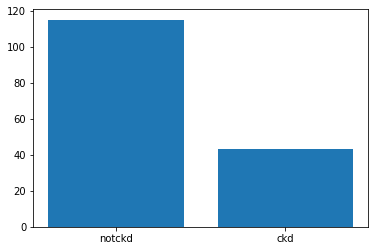

In [123]:
plt.bar(df['class'].value_counts().keys(), df['class'].value_counts().values)

In [124]:
df.tail(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
395,396,55,80,1.02,0,0,normal,normal,notpresent,notpresent,140,49,0.5,150,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,31,1.2,141,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,398,12,80,1.02,0,0,normal,normal,notpresent,notpresent,100,26,0.6,137,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,50,1,135,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd
399,400,58,80,1.025,0,0,normal,normal,notpresent,notpresent,131,18,1.1,141,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd


In [125]:
numeric_columns = ['age', 'bp', 'sg', 'al', 'bgr','bu','sc','sod','pot','hemo','pcv', 'wbcc', 'rbcc']

In [126]:
cat_cols = []
for c in list(df.columns):
    if c not in numeric_columns:
        cat_cols.append(c)

In [127]:
cat_cols = cat_cols[1:-1]

In [128]:
cat_cols

['su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [129]:
for n in numeric_columns:
    df[n] = df[n].astype(str).astype(float)

In [130]:
le = LabelEncoder()
for c in cat_cols:
    df[c] = le.fit_transform(df[c])

In [131]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,4,48.0,70.0,1.005,4.0,0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,ckd
9,10,53.0,90.0,1.020,2.0,0,0,0,1,0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,1,1,0,1,0,1,ckd
11,12,63.0,70.0,1.010,3.0,0,0,0,1,0,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,1,1,0,1,1,0,ckd
14,15,68.0,80.0,1.010,3.0,2,1,0,1,1,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,1,1,1,1,1,0,ckd
20,21,61.0,80.0,1.015,2.0,0,0,0,0,0,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,1,1,1,1,1,1,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55.0,80.0,1.020,0.0,0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,notckd
396,397,42.0,70.0,1.025,0.0,0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,notckd
397,398,12.0,80.0,1.020,0.0,0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,notckd
398,399,17.0,60.0,1.025,0.0,0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,notckd


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      158 non-null    int64  
 1   age     158 non-null    float64
 2   bp      158 non-null    float64
 3   sg      158 non-null    float64
 4   al      158 non-null    float64
 5   su      158 non-null    int64  
 6   rbc     158 non-null    int64  
 7   pc      158 non-null    int64  
 8   pcc     158 non-null    int64  
 9   ba      158 non-null    int64  
 10  bgr     158 non-null    float64
 11  bu      158 non-null    float64
 12  sc      158 non-null    float64
 13  sod     158 non-null    float64
 14  pot     158 non-null    float64
 15  hemo    158 non-null    float64
 16  pcv     158 non-null    float64
 17  wbcc    158 non-null    float64
 18  rbcc    158 non-null    float64
 19  htn     158 non-null    int64  
 20  dm      158 non-null    int64  
 21  cad     158 non-null    int64  
 22  ap

In [133]:
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [134]:
class_dict = {'ckd':1, 'notckd':0}

In [135]:
df['class'] = df['class'].map(class_dict)

In [136]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,4,48.0,70.0,1.005,4.0,0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,1
9,10,53.0,90.0,1.020,2.0,0,0,0,1,0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,1,1,0,1,0,1,1
11,12,63.0,70.0,1.010,3.0,0,0,0,1,0,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,1,1,0,1,1,0,1
14,15,68.0,80.0,1.010,3.0,2,1,0,1,1,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,1,1,1,1,1,0,1
20,21,61.0,80.0,1.015,2.0,0,0,0,0,0,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55.0,80.0,1.020,0.0,0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,0
396,397,42.0,70.0,1.025,0.0,0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,0
397,398,12.0,80.0,1.020,0.0,0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,0
398,399,17.0,60.0,1.025,0.0,0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,0


In [137]:
X = df.drop(['class'], axis=1)
y = df['class']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Random Forest Model

In [139]:
model = RandomForestClassifier()

In [140]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [141]:
preds = model.predict(X_test)

### Model Evaluation

In [142]:
accuracy_score(y_test, preds)

1.0

In [143]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [144]:
import pickle as pkl

filename = '../kidney_disease.pkl'
pkl.dump(model, open(filename, 'wb'))
pd.concat([X_test,y_test],axis=1).to_csv(f"../test_data.csv", index=False)